In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox  
from osmnx import geocoder
import matplotlib.animation as animation
import random
import time
import imageio
import networkx as nx
import imageio.v2 as imageio
from io import BytesIO
from multiprocessing import Pool

/home/francesco/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/francesco/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')
print(nodes)
#fig, ax = ox.plot_graph(G)


             osmid          y          x  street_count   highway  ref railway  \
0           118725  55.673976  12.562910             1       NaN  NaN     NaN   
1           118738  55.662837  12.561835             1       NaN  NaN     NaN   
2           118744  55.661718  12.560034             4       NaN  NaN     NaN   
3           118759  55.657275  12.553866             3       NaN  NaN     NaN   
4           118768  55.652331  12.548202             3       NaN  NaN     NaN   
...            ...        ...        ...           ...       ...  ...     ...   
37108  12572453856  55.715085  12.577400             3       NaN  NaN     NaN   
37109  12572453870  55.715084  12.577364             1  crossing  NaN     NaN   
37110  12572453871  55.715105  12.577399             1       NaN  NaN     NaN   
37111  12572453892  55.715103  12.577940             3       NaN  NaN     NaN   
37112  12587505977  55.653394  12.638703             3       NaN  NaN     NaN   

                           

In [3]:
G = ox.load_graphml('graph.graphml')
#print(G)

In [4]:
from function import evolution

Populating with 4 paths:
All 4 paths found! 
############### 

Generation 1 time for it : 0.050768136978149414
Best length 134800.6478056911
Generation 2 time for it : 0.04308342933654785
Best length 134310.4298128105
Generation 3 time for it : 0.04349708557128906
Best length 133413.84273814724
Generation 4 time for it : 0.04418611526489258
Best length 133413.84273814724
Generation 5 time for it : 0.0504150390625
Best length 133413.84273814724
Start plotting GIF
GIF saved as best_paths.gif


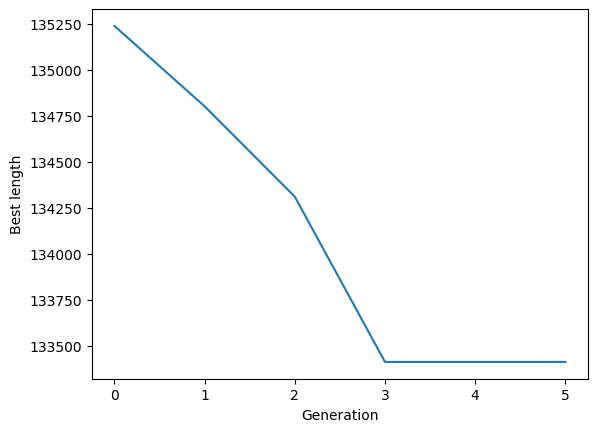

In [5]:
latstart, lonstart = ox.geocoder.geocode('Jagtvej 155, 2200 København, Danmark')
nodestart = ox.distance.nearest_nodes(G, lonstart, latstart)
latend, lonend = ox.geocoder.geocode('Nørregade 10, 1172 København, Danmark')
nodeend = ox.distance.nearest_nodes(G, lonend, latend)


best_path, best_lengths = evolution(nodestart, nodeend, 5, 0.7, 4)
plt.plot(best_lengths)
plt.xlabel('Generation')
plt.ylabel('Best length')
plt.show()